In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('./datasets/wine_data.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data understanding and preparation

### Missing values

In [2]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There is no missing values in features

### Anomalies detection

Checking all columns for anomalies

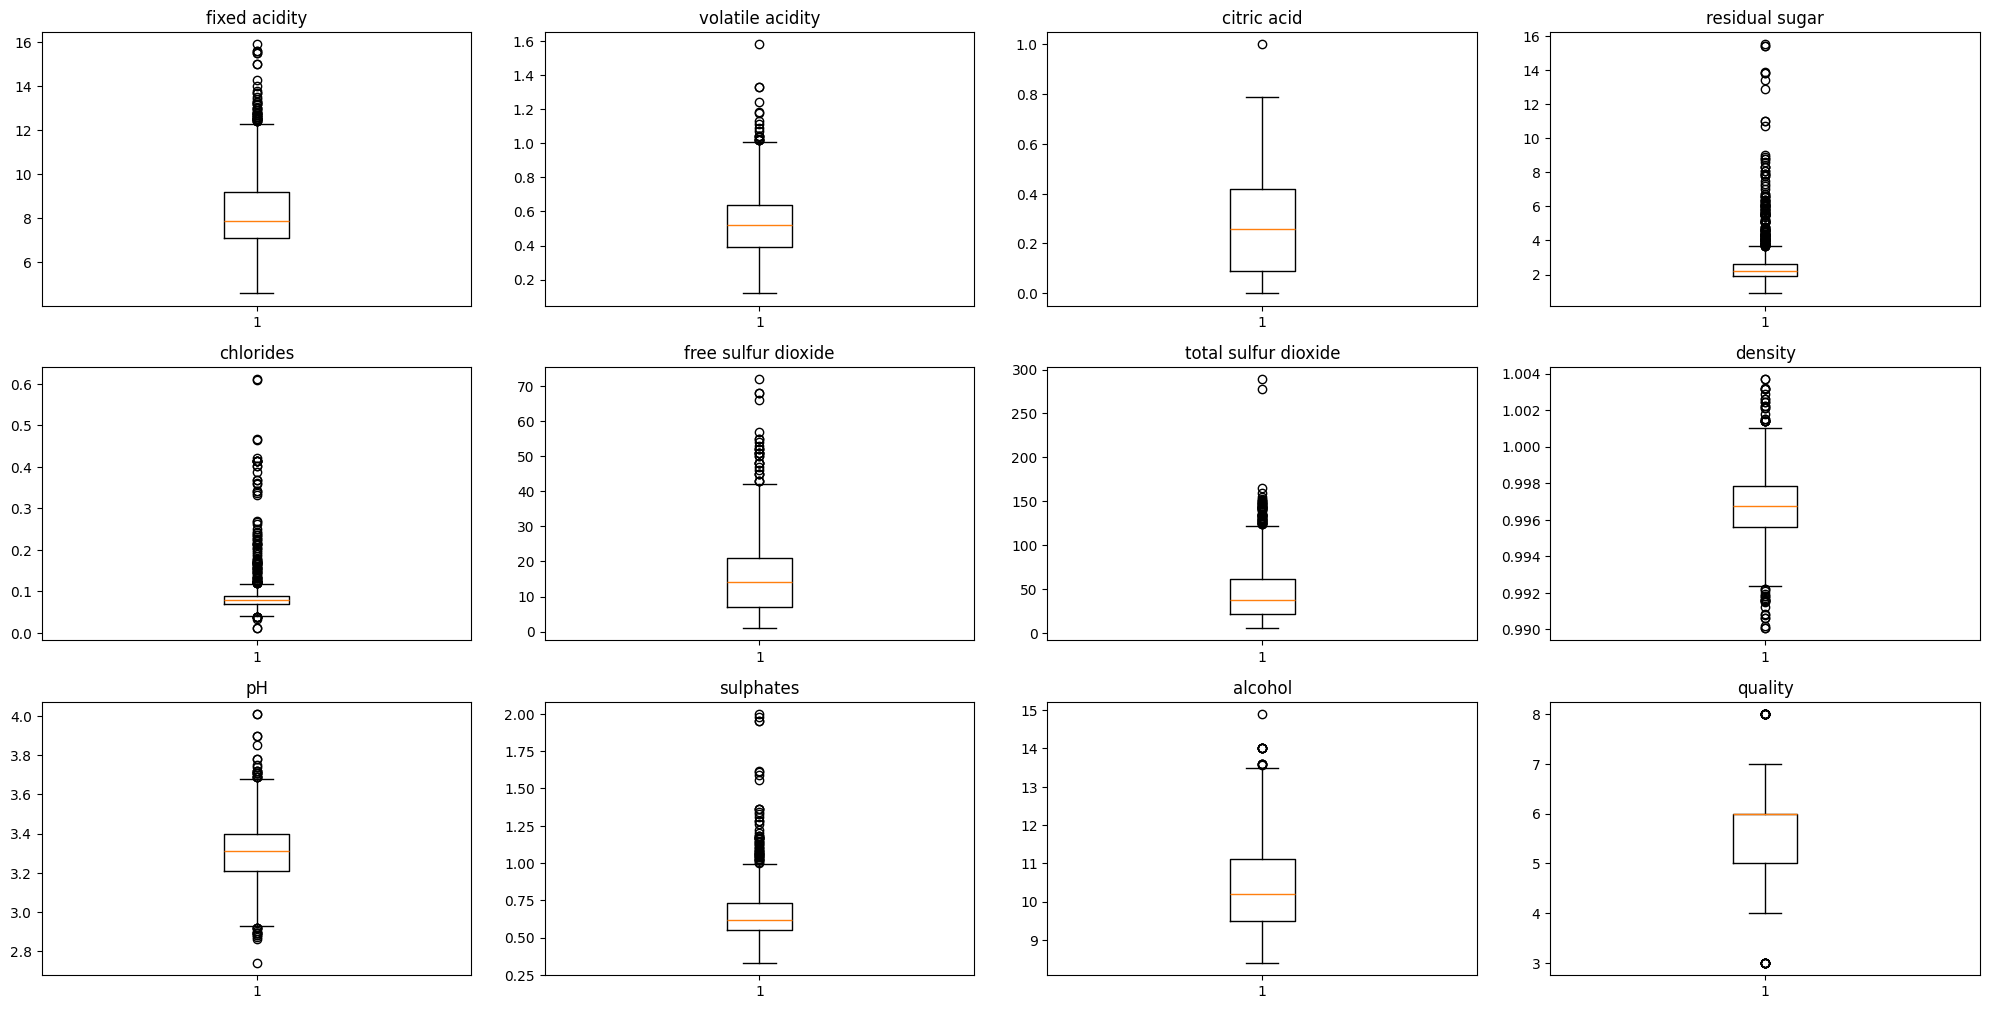

In [3]:
plt.figure(figsize=(20,20))
for ind,col in enumerate(df.columns):
    plt.subplot((len(df.columns)+1)//2,4,ind+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Features that have too much anomalies, and worth for cleaning:
1) fixed acidity
2) volatile acidity
3) residual sugar
4) chlorides
5) total sulfur dioxide
6) sulphates

In [4]:
anom_cols=['fixed acidity', 'volatile acidity', 'residual sugar','chlorides', 
           'total sulfur dioxide','sulphates']

#### Cleaning with IQR method

In [5]:
cleaned_iqr_df=df.copy()
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-iqr*1.5
    upper=q3+iqr*1.5
    anoms=df[(df[col]<lower)|(df[col]>upper)]
    cleaned_iqr_df=cleaned_iqr_df.drop(anoms.index,axis=0,errors='ignore')

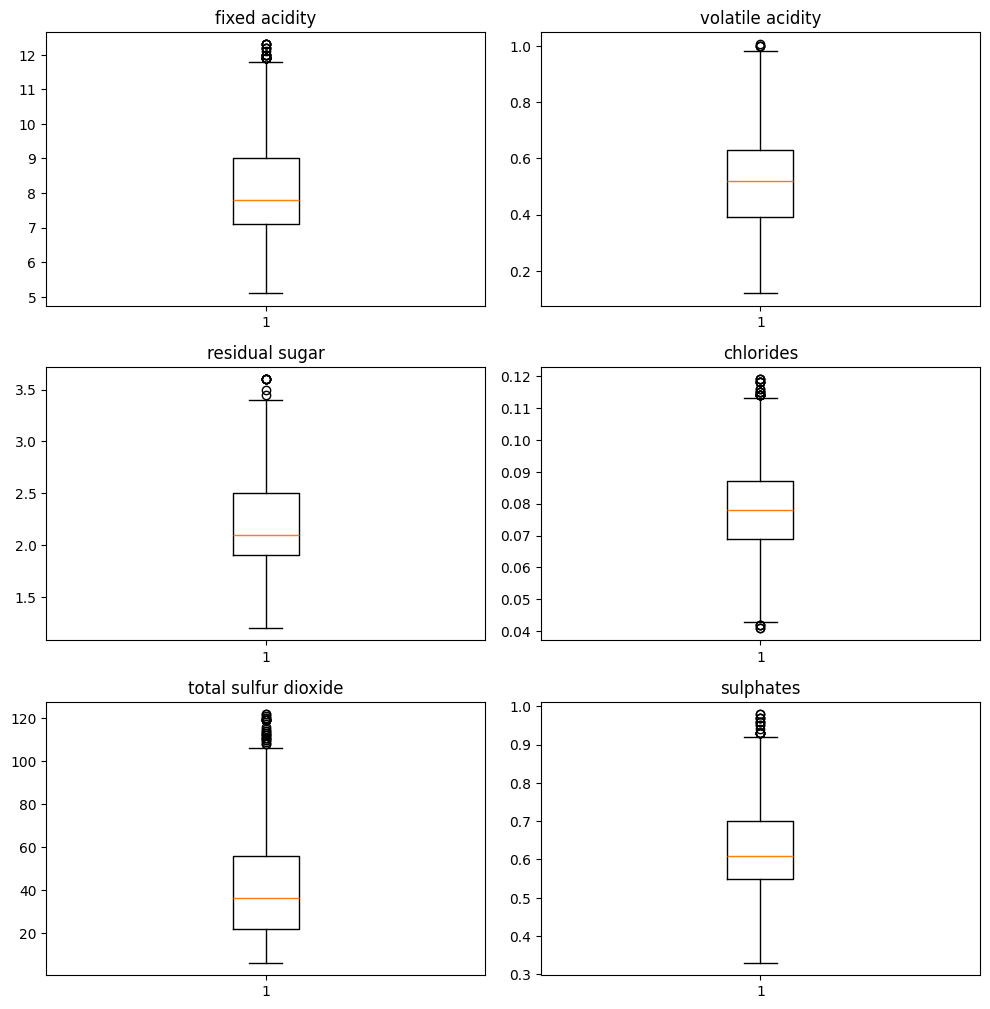

In [6]:
plt.figure(figsize=(10,20))
for ind,col in enumerate(anom_cols):
    plt.subplot((len(cleaned_iqr_df.columns)+1)//2,2,ind+1)
    plt.boxplot(cleaned_iqr_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
print(f'Objects deleted: {df.shape[0]-cleaned_iqr_df.shape[0]}')

Objects deleted: 420


#### Cleaning with Zscore method

In [8]:
cleaned_zscore_df=df.copy()
for col in anom_cols:
    col_mean=np.mean(df[col])
    col_std=np.std(df[col])
    scores=(df[col]-col_mean)/col_std
    index=np.where(np.abs(scores)>3)[0]
    cleaned_zscore_df=cleaned_zscore_df.drop(index,axis=0,errors='ignore')

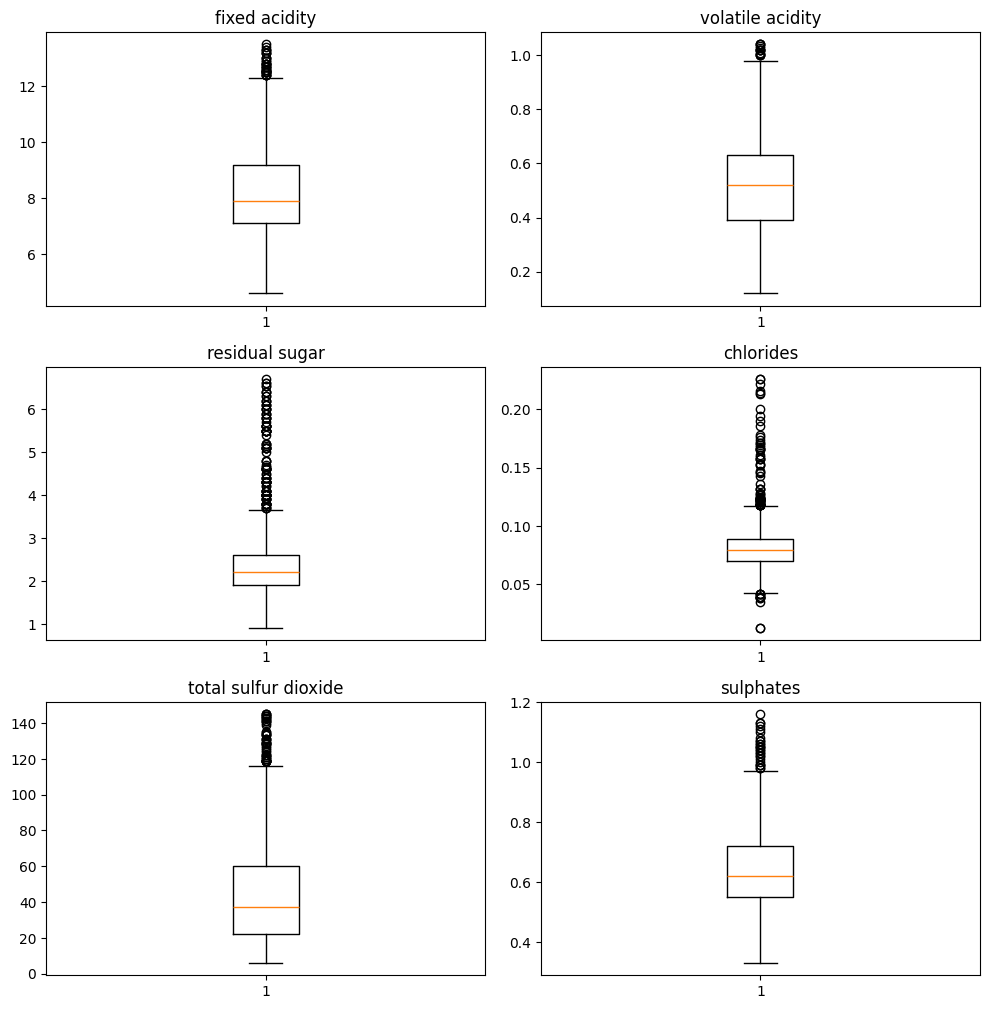

In [9]:
plt.figure(figsize=(10,20))
for ind,col in enumerate(anom_cols):
    plt.subplot((len(cleaned_zscore_df.columns)+1)//2,2,ind+1)
    plt.boxplot(cleaned_zscore_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
print(f'Objects deleted: {df.shape[0]-cleaned_zscore_df.shape[0]}')

Objects deleted: 107


#### Cleaning with isolation forest model

In [11]:
from sklearn.ensemble import IsolationForest
iso_for=IsolationForest(contamination=0.1,random_state=42)
df['Anomalies']=iso_for.fit_predict(df)
anoms=df[df['Anomalies']==-1]
cleaned_iso_for_df=df.drop(anoms.index,axis=0)

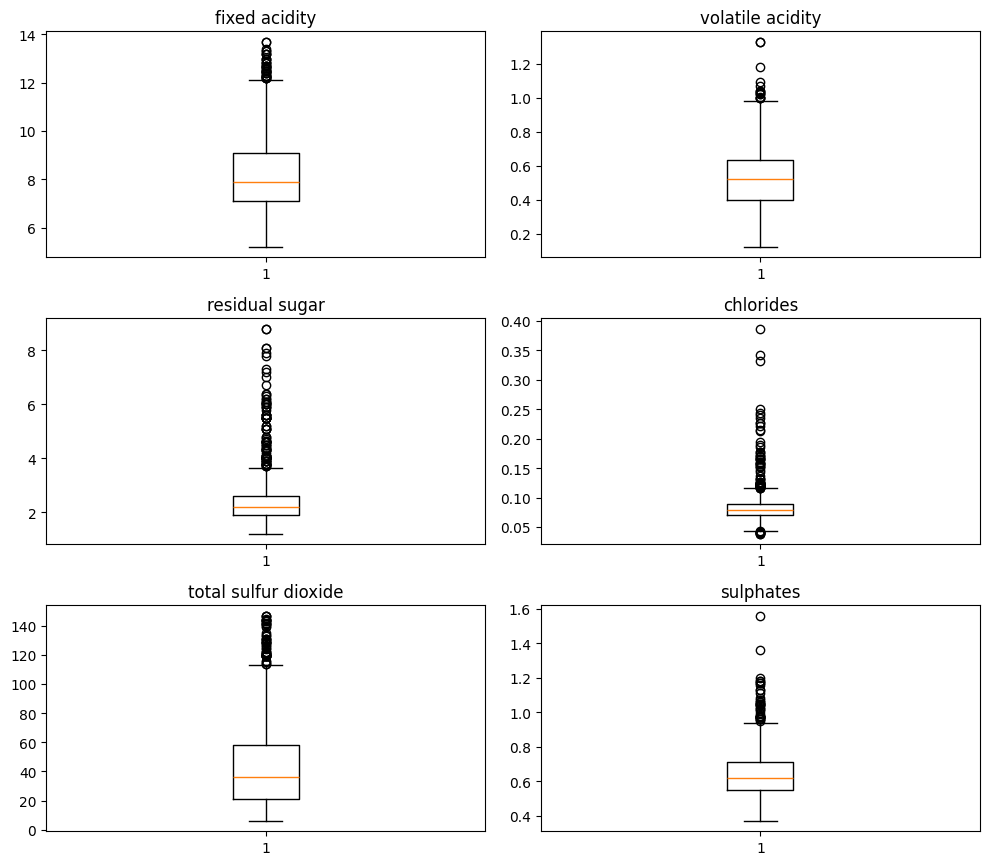

In [12]:
plt.figure(figsize=(10,20))
for ind,col in enumerate(anom_cols):
    plt.subplot((len(cleaned_iso_for_df.columns)+1)//2,2,ind+1)
    plt.boxplot(cleaned_iso_for_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
print(f'Objects deleted: {df.shape[0]-cleaned_iso_for_df.shape[0]}')

Objects deleted: 160


#### Conclusion

Z score worked best, because biggest anomalies were deleted, not so much from dataset were deteled

In [16]:
cleaned_df=cleaned_zscore_df.copy()
cleaned_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
cleaned_df.to_csv('./datasets/prep_data.csv')

## Model selection

In [18]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,accuracy_score, recall_score,f1_score
import joblib

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(cleaned_df.drop('quality', axis=1),cleaned_df['quality'],test_size=0.3,random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)
train_data=pd.concat([x_train,y_train],axis=1)
train_data.to_csv('./datasets/wine_train_data.csv')
test_data=pd.concat([x_test,y_test],axis=1)
test_data.to_csv('./datasets/wine_test_data.csv')
val_data=pd.concat([x_val,y_val],axis=1)
val_data.to_csv('./datasets/wine_val_data.csv')

In [20]:
metrics=[]
models={
    'logi reg':LogisticRegression(random_state=42),
    'sgd':SGDClassifier(random_state=42),
    'svc':SVC(random_state=42),
    'bayes': GaussianNB(),
    'k-neight': KNeighborsClassifier(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'gradient': GradientBoostingClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42)
}

In [21]:
for name,model in models.items():
    print(f'{name} is trining')
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    metrics.append({
        'Model name': name,
        'Accuracy': accuracy_score(y_test,pred),
        'Precision':precision_score(y_test,pred,average='macro'),
        'Recall': recall_score(y_test,pred,average='macro'),
        'F1 score': f1_score(y_test,pred,average='macro')
    })

logi reg is trining
sgd is trining
svc is trining
bayes is trining
k-neight is trining
decision tree is trining


/home/computer/etc/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/computer/etc/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/computer/etc/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and be

gradient is trining
random forest is trining


/home/computer/etc/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
metrics=pd.DataFrame(metrics)
metrics

,Model name,Accuracy,Precision,Recall,F1 score
0,logi reg,0.556250,0.254741,0.250885,0.247673
1,sgd,0.453125,0.262863,0.260204,0.215073
2,svc,0.509375,0.343222,0.209796,0.193260
3,bayes,0.546875,0.286930,0.275777,0.279924
4,k-neight,0.465625,0.213953,0.205997,0.202071
5,decision tree,0.603125,0.364085,0.352550,0.357159
6,gradient,0.609375,0.410593,0.332978,0.350332
7,random forest,0.678125,0.331011,0.332809,0.330797


In [23]:
metrics.loc[metrics.idxmax(),'Model name']

2              svc
7    random forest
6         gradient
5    decision tree
5    decision tree
Name: Model name, dtype: object

Decision tree look as the best option

### Hyperparameters tuning

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [26]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':[None,'sqrt','log2'],
    'ccp_alpha':[0.0,0.01,0.1],
    'splitter':['best','random']
}

grid=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    n_jobs=10
)
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=10,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
pred=grid.predict(x_test)
acc=accuracy_score(y_test,pred)
pre=precision_score(y_test,pred,average='micro',zero_division=0.0)
rec=recall_score(y_test,pred,average='micro')
f1=f1_score(y_test,pred,average='micro')

In [28]:
dod=pd.DataFrame([{
    'Model name': 'decision tree(tuned)',
    'Accuracy': acc,
    'Precision':pre,
    'Recall': rec,
    'F1 score': f1
}])
pd.DataFrame(pd.concat([metrics[metrics['Model name']=='decision tree'],dod]))

,Model name,Accuracy,Precision,Recall,F1 score
5,decision tree,0.603125,0.364085,0.35255,0.357159
0,decision tree(tuned),0.625000,0.625000,0.62500,0.625000


In [29]:
grid.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [31]:
best_model=grid.best_estimator_
joblib.dump(best_model,'./src/wine_model.pkl')

['./src/wine_model.pkl']